In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Insulin'>

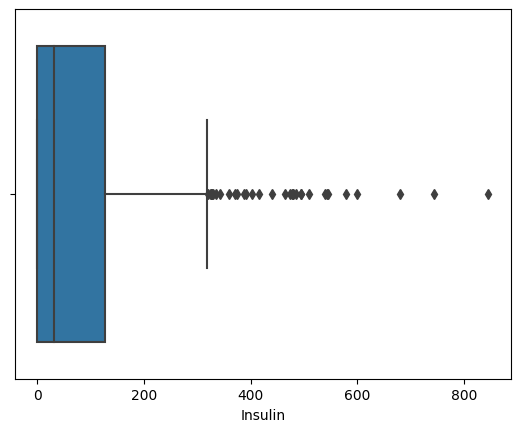

In [3]:
sns.boxplot(x= df['Insulin'])

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


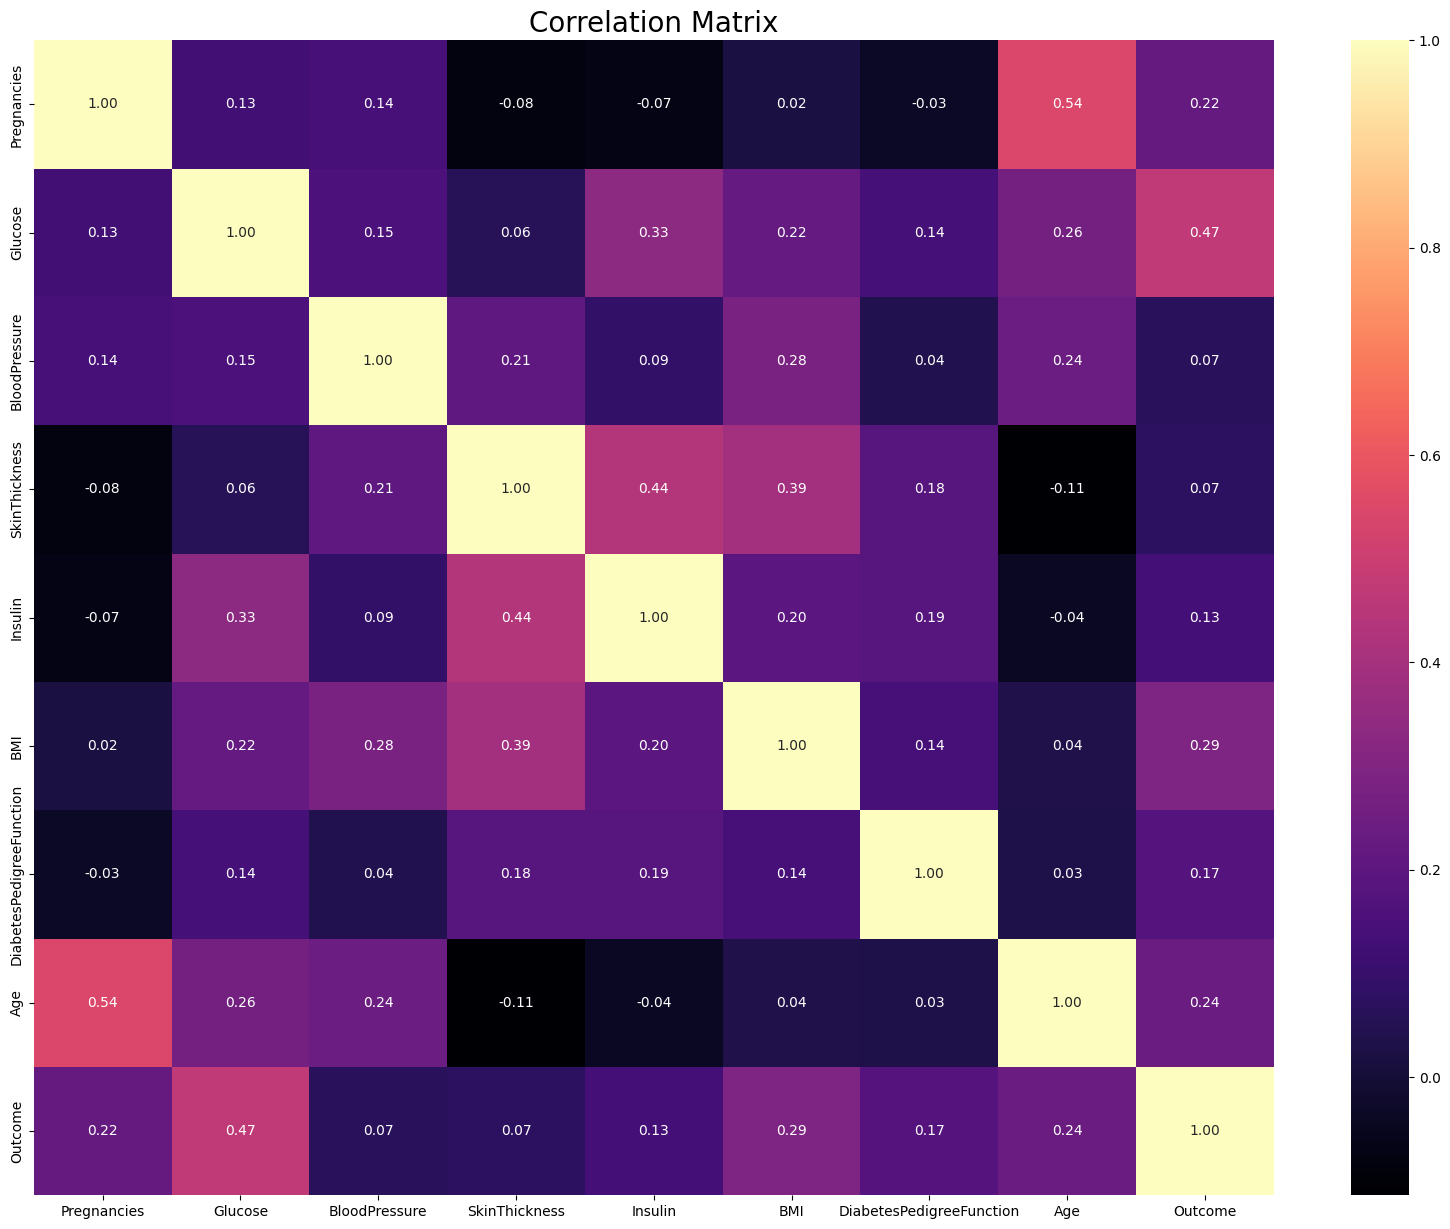

In [6]:
f, ax = plt.subplots(figsize= [20,15])

sns.heatmap(df.corr(), annot= True, fmt= ".2f", ax= ax, cmap= "magma")

ax.set_title("Correlation Matrix", fontsize= 20)

plt.show()

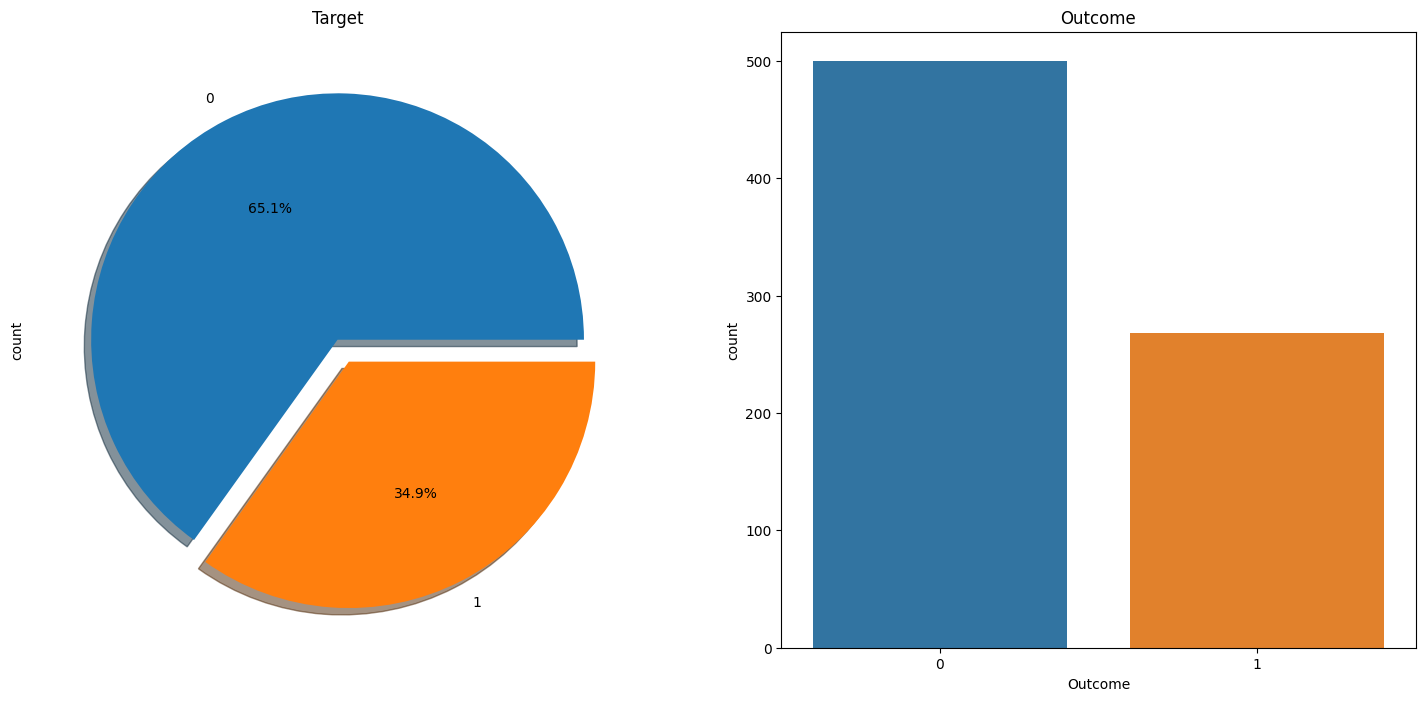

In [7]:
f, ax = plt.subplots(1, 2, figsize= (18,8))

df['Outcome'].value_counts().plot.pie(explode= [0, 0.1], autopct= '%1.1f%%', ax= ax[0], shadow= True)

ax[0].set_title('Target')

sns.countplot(x= 'Outcome',data= df, ax= ax[1])

ax[1].set_title('Outcome')
plt.show()

In [8]:
x = df.drop(['Outcome'], axis= 1)
y = df['Outcome']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 42)

In [10]:
rf = RandomForestClassifier()

clf = rf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_pred, y_test)

0.7637795275590551

In [11]:
tree = GradientBoostingClassifier()

clf = tree.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_pred, y_test)

0.7322834645669292

In [12]:
svm = SVC(gamma= 'auto')

clf = svm.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_pred, y_test)

0.6614173228346457